## Overview at a Protein Level



In [1]:
import load_data
data_raw = load_data.load_FragPipe(version="July_noMBR_FP", contains=[])

Here we display the raw data. Note that it yeilds 15 columns, as there are 5 conditions in triplicates. For each protein, these samples are marked as "NaN" to indicate that the protein was not identified, "By matching" to indicate that the protein was identified in that sample only with match between runs, or "By MS/MS" indicating MS/MS identification.

In [2]:
data_raw

,Blank_3,Blank_4,Blank_5,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,0.0,0.0,0.0,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,0.0,0.0,0.0,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,0.0,0.0,0.0,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
Q14C86,0.0,0.0,0.0,0.0,0.0,1139333.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1029046.4,0.00
Q8N4T8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


Here we load functions that will be used.

In [3]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Counts by Sample

Now we can get the number of proteins identified  in each sample. 

In [4]:
import data_utils

counts = data_raw.apply(np.count_nonzero)
counts.sort_values()

#counts.to_csv('data/protein_counts.csv'.format(version))
counts

Blank_3                          811
Blank_4                          788
Blank_5                          735
Subject1_B_cells_062920_C_10    1240
Subject1_B_cells_062920_C_11    1080
Subject1_B_cells_062920_C_12    1332
Subject1_B_cells_062920_C_13    1080
Subject1_B_cells_062920_C_9     1161
Subject1_B_cells_072920_C_4     1328
Subject1_B_cells_072920_C_5     1483
Subject1_B_cells_072920_C_6     1430
Subject1_B_cells_072920_C_8     1426
Subject1_B_cells_072920_C_9     1464
Subject1_T_cells_062920_D_10    1151
Subject1_T_cells_062920_D_11    1265
Subject1_T_cells_062920_D_12    1140
Subject1_T_cells_062920_D_13    1144
Subject1_T_cells_062920_D_9     1171
Subject1_T_cells_072920_D_2     1422
Subject1_T_cells_072920_D_4     1383
Subject1_T_cells_072920_D_5     1297
Subject1_T_cells_072920_D_6     1420
Subject1_T_cells_072920_D_7     1353
Subject2_B_cells_062920_E_11    1176
Subject2_B_cells_062920_E_12    1142
Subject2_B_cells_062920_E_13    1161
Subject2_B_cells_062920_E_16    1170
S

Here we visualized that same data for clarity. 

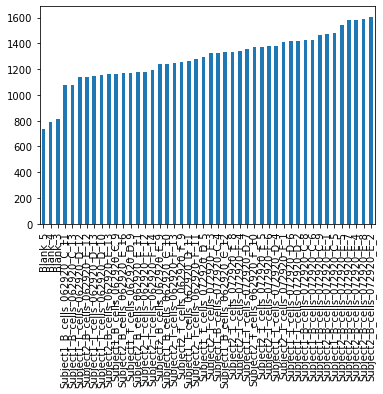

In [5]:
counts.sort_values().plot.bar()
plt.show()

Here we declare the sample types, or the conditions. In this case, cell type and collection date define the conditions. In this version of our functions, the type identifier string has to be in the column name.

In [6]:
cell_types = ['B_cells_062920','T_cells_062920',
              'B_cells_072920','T_cells_072920']

To improve the bar plot, we will assign a color to each type to make the triplicates more distinct.

In [7]:
colors = ['#0066ff','orange','#0066ff','orange','#0066ff']
samples=np.array(data_raw.columns.values)

color_by_type = []
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    for c in cells_of_type:
        color_by_type.append(colors[0])
    colors.pop(0)

Replot with colors and labels.

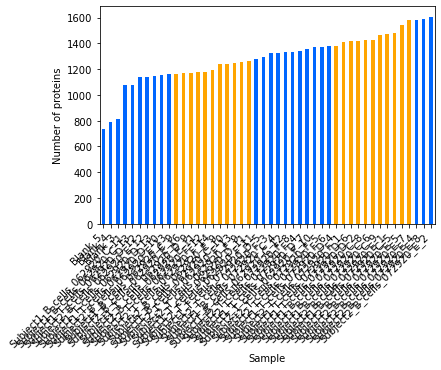

In [8]:
fig = counts.sort_values().plot.bar(color=color_by_type)
plt.setp(fig.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.xlabel("Sample")
plt.ylabel("Number of proteins")
plt.show()
#plt.savefig('data/AutoPOTS_{0}/protein_counts_byMSMS.png'.format(version), dpi=300, bbox_inches='tight')

.

### Present in at least half replicates

In [9]:
import data_utils

Next, we identify those present in at least half of the replicates. This gives us a dataframe with the proteins by sample type with True marked for those proteins present in a type.

In [10]:
present_in = data_raw.apply(data_utils.presence_by_type, cell_types=cell_types, 
                            min_reps=5, null_value=0, axis=1)
present_in.head()

,B_cells_062920,T_cells_062920,B_cells_072920,T_cells_072920
Protein ID,,,,
A0A0B4J2D5,True,True,True,True
A0AVT1,True,True,True,True
A0FGR8,False,False,False,False
A6NHR9,True,False,True,False
A8K2U0,False,False,False,False


(The sum of a True/False list is equal to the number of True values as True=1 and False=0) This allows us to summarize and visualize the number in each sample type.

In [11]:
present_in_counts = present_in.apply(sum)
#present_in_counts.to_csv('data/proteins_in_half.tsv'.format(version), sep='\t')
present_in_counts

B_cells_062920    1191
T_cells_062920    1263
B_cells_072920    1564
T_cells_072920    1410
dtype: int64

### Display as Venn diagram
Four way venn diagrams can be generated in python. 

In [12]:
import venn
from numpy import nan

D:\Program_Files\Anaconda\lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
D:\Program_Files\Anaconda\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


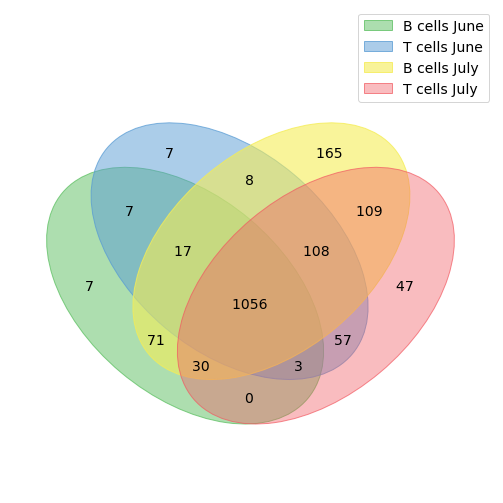

In [13]:
set_cols = {}
for col in present_in:
    set_cols[col] = set(present_in[col].replace(False, nan).dropna().index)


labels = venn.get_labels(set_cols.values(), fill=['number'])
fig, ax = venn.venn4(labels, names=['B cells June', 'T cells June', 'B cells July', 'T cells July'])
plt.savefig('data/venn.png', dpi=300, bbox_inches='tight')

Another way to display a venn diagram is using an online tool, such as www.interactivenn.net. This often requires a particular formatting. In this case, outputting as columns works well. Using these tools may allow different formatting, in this case attaching the labels to the ovals and using softer colors.

In [14]:
pd.Series(list(set_cols['B_cells_062920'])).to_csv('data/setsB6.csv')
pd.Series(list(set_cols['B_cells_072920'])).to_csv('data/setsB7.csv')
pd.Series(list(set_cols['T_cells_062920'])).to_csv('data/setsT6.csv')
pd.Series(list(set_cols['T_cells_072920'])).to_csv('data/setsT7.csv')

#These columns can be copied to http://www.interactivenn.net/